In [1]:
%load_ext lab_black

In [48]:
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

# from sklearn.metrics import plot_confusion_matrix

import joblib

In [3]:
df = pd.read_csv("heart_disease_data.csv")

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,condition
0,69,1,0,160,234,1,131,0,0
1,69,0,0,140,239,0,151,0,0
2,66,0,0,150,226,0,114,0,0
3,65,1,0,138,282,1,174,0,1
4,64,1,0,110,211,0,144,1,0


In [5]:
df = (
    df.drop("restecg", axis=1)
    .drop("oldpeak", axis=1)
    .drop("slope", axis=1)
    .drop("ca", axis=1)
    .drop("thal", axis=1)
)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'condition'],
      dtype='object')

In [6]:
df["condition"].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [7]:
# pipeline for exang: exercise induced angina (1 = yes; 0 = no)
# df = df.assign(exang=lambda df: df["exang"].replace({0: "no", 1: "yes"}))

In [8]:
# pipeline for fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# df = df.assign(fbs=lambda df: df["fbs"].replace({0: "false", 1: "true"}))

In [9]:
# pipeline for cp: chest pain type
# df = df.assign(
#     cp=lambda df: df["cp"].replace(
#         {
#             0: "typical angina",
#             1: "atypical angina",
#             2: "non-anginal pain",
#             3: "asymptomatic",
#         }
#     )
# )

In [10]:
y = df["condition"].values
X = df.drop("condition", axis=1).values

In [11]:
y

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [12]:
X

array([[ 69,   1,   0, ...,   1, 131,   0],
       [ 69,   0,   0, ...,   0, 151,   0],
       [ 66,   0,   0, ...,   0, 114,   0],
       ...,
       [ 35,   1,   3, ...,   0, 130,   1],
       [ 35,   0,   3, ...,   0, 182,   0],
       [ 35,   1,   3, ...,   0, 156,   1]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        40
           1       0.82      0.66      0.73        35

   micro avg       0.77      0.77      0.77        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.78      0.77      0.77        75



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
# accuracy score for Logistic Regression Model

accuracy_score(y_test, y_test_pred_lr)

0.7733333333333333

In [16]:
# Dummy Classifier

dc = DummyClassifier()
dc.fit(X_train, y_train)
y_test_pred_dc = dc.predict(X_test)
print(classification_report(y_test, y_test_pred_dc))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        40
           1       0.58      0.51      0.55        35

   micro avg       0.60      0.60      0.60        75
   macro avg       0.60      0.59      0.59        75
weighted avg       0.60      0.60      0.60        75



In [17]:
# accuracy score for Dummy Classifier

accuracy_score(y_test, y_test_pred_dc)

0.6

In [18]:
# Decision Tree Model (unpruned)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_test_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        40
           1       0.61      0.54      0.58        35

   micro avg       0.63      0.63      0.63        75
   macro avg       0.62      0.62      0.62        75
weighted avg       0.63      0.63      0.62        75



In [19]:
# accuracy score for decision tree model (unpruned)

accuracy_score(y_test, y_test_pred_dt)

0.6266666666666667

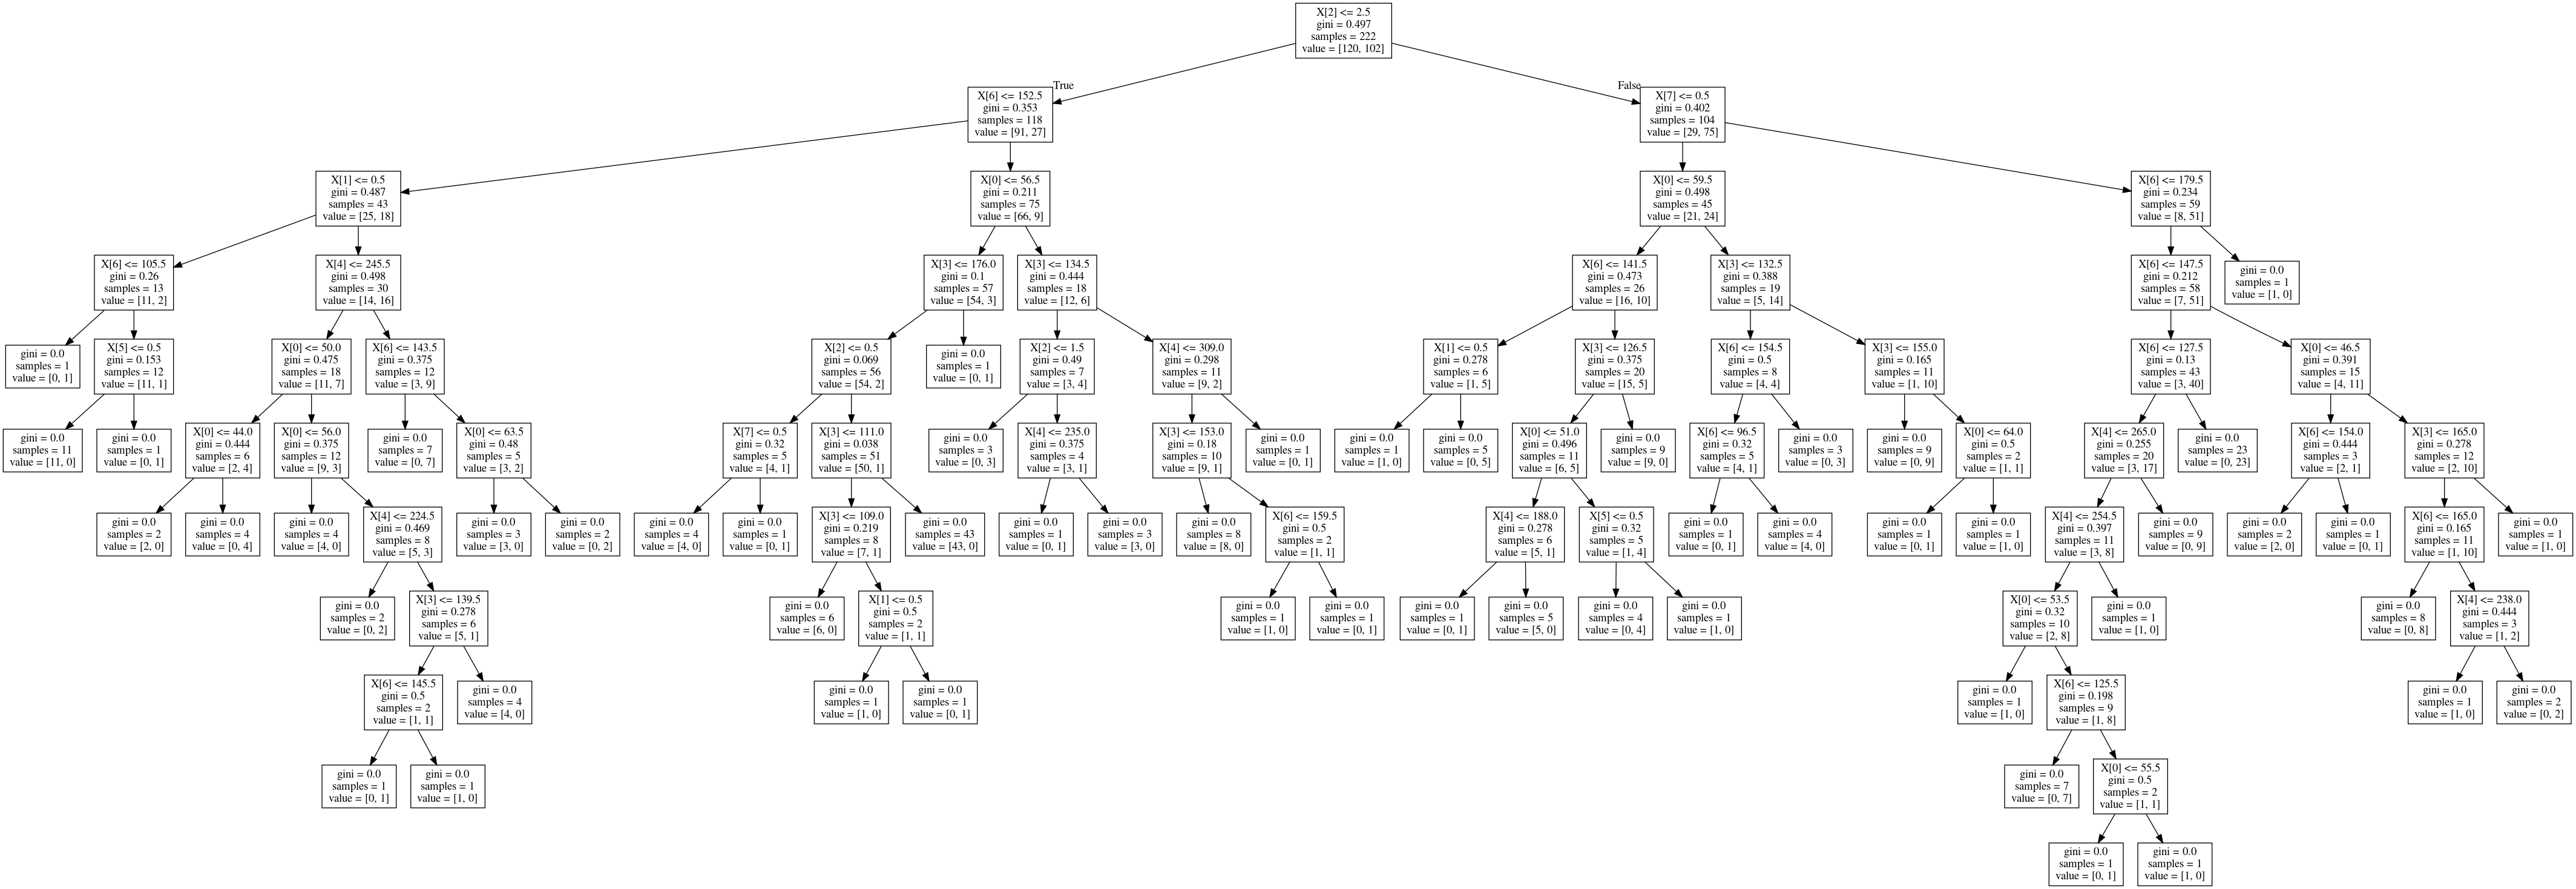

In [20]:
# Unpruned Tree

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())

In [21]:
# Prune the tree - gini

dt_p1 = DecisionTreeClassifier(criterion="gini")
dt_p1.fit(X_train, y_train)
y_test_pred_dt_p1 = dt_p1.predict(X_test)
print("Criterion=gini", classification_report(y_test, y_test_pred_dt_p1))

Criterion=gini               precision    recall  f1-score   support

           0       0.65      0.70      0.67        40
           1       0.62      0.57      0.60        35

   micro avg       0.64      0.64      0.64        75
   macro avg       0.64      0.64      0.64        75
weighted avg       0.64      0.64      0.64        75



In [22]:
# accuracy score for decision tree model using gini

accuracy_score(y_test, y_test_pred_dt_p1)

0.64

In [23]:
# Prune the tree - entropy

dt_p2 = DecisionTreeClassifier(criterion="entropy")
dt_p2.fit(X_train, y_train)
y_test_pred_dt_p2 = dt_p2.predict(X_test)
print("Criterion=entropy", classification_report(y_test, y_test_pred_dt_p2))

Criterion=entropy               precision    recall  f1-score   support

           0       0.76      0.78      0.77        40
           1       0.74      0.71      0.72        35

   micro avg       0.75      0.75      0.75        75
   macro avg       0.75      0.74      0.75        75
weighted avg       0.75      0.75      0.75        75



In [24]:
# accuracy score for decision tree model using entropy

accuracy_score(y_test, y_test_pred_dt_p2)

0.7466666666666667

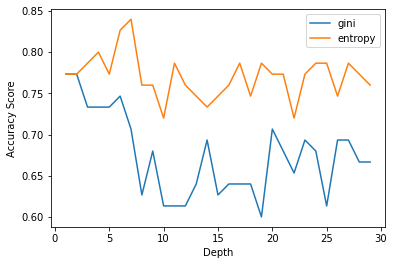

In [25]:
# Prune the tree - loop to find best depth

max_depth_dt = []
acc_gini_dt = []
acc_entropy_dt = []
for i in range(1, 30):
    tree_dt = DecisionTreeClassifier(criterion="gini", max_depth=i)
    tree_dt.fit(X_train, y_train)
    pred_g_dt = tree_dt.predict(X_test)
    acc_gini_dt.append(accuracy_score(y_test, pred_g_dt))

    tree_dt = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    tree_dt.fit(X_train, y_train)
    pred_e_dt = tree_dt.predict(X_test)
    acc_entropy_dt.append(accuracy_score(y_test, pred_e_dt))

    max_depth_dt.append(i)

df_dt = pd.DataFrame(
    {
        "acc_gini_dt": pd.Series(acc_gini_dt),
        "acc_entropy_dt": pd.Series(acc_entropy_dt),
        "max_depth_dt": pd.Series(max_depth_dt),
    }
)

# visualizing changes in parameters
plt.plot("max_depth_dt", "acc_gini_dt", data=df_dt, label="gini")
plt.plot("max_depth_dt", "acc_entropy_dt", data=df_dt, label="entropy")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()

In [26]:
# Prune tree using entropy at 7

dt_p_fin = DecisionTreeClassifier(criterion="entropy", max_depth=7)
dt_p_fin.fit(X_train, y_train)
y_test_pred_dt_p_fin = dt_p_fin.predict(X_test)
print("Criterion=entropy", classification_report(y_test, y_test_pred_dt_p_fin))

Criterion=entropy               precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.81      0.83      0.82        35

   micro avg       0.83      0.83      0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



In [27]:
# accuracy score for decision tree model pruned at 7 using entropy

accuracy_score(y_test, y_test_pred_dt_p_fin)

0.8266666666666667

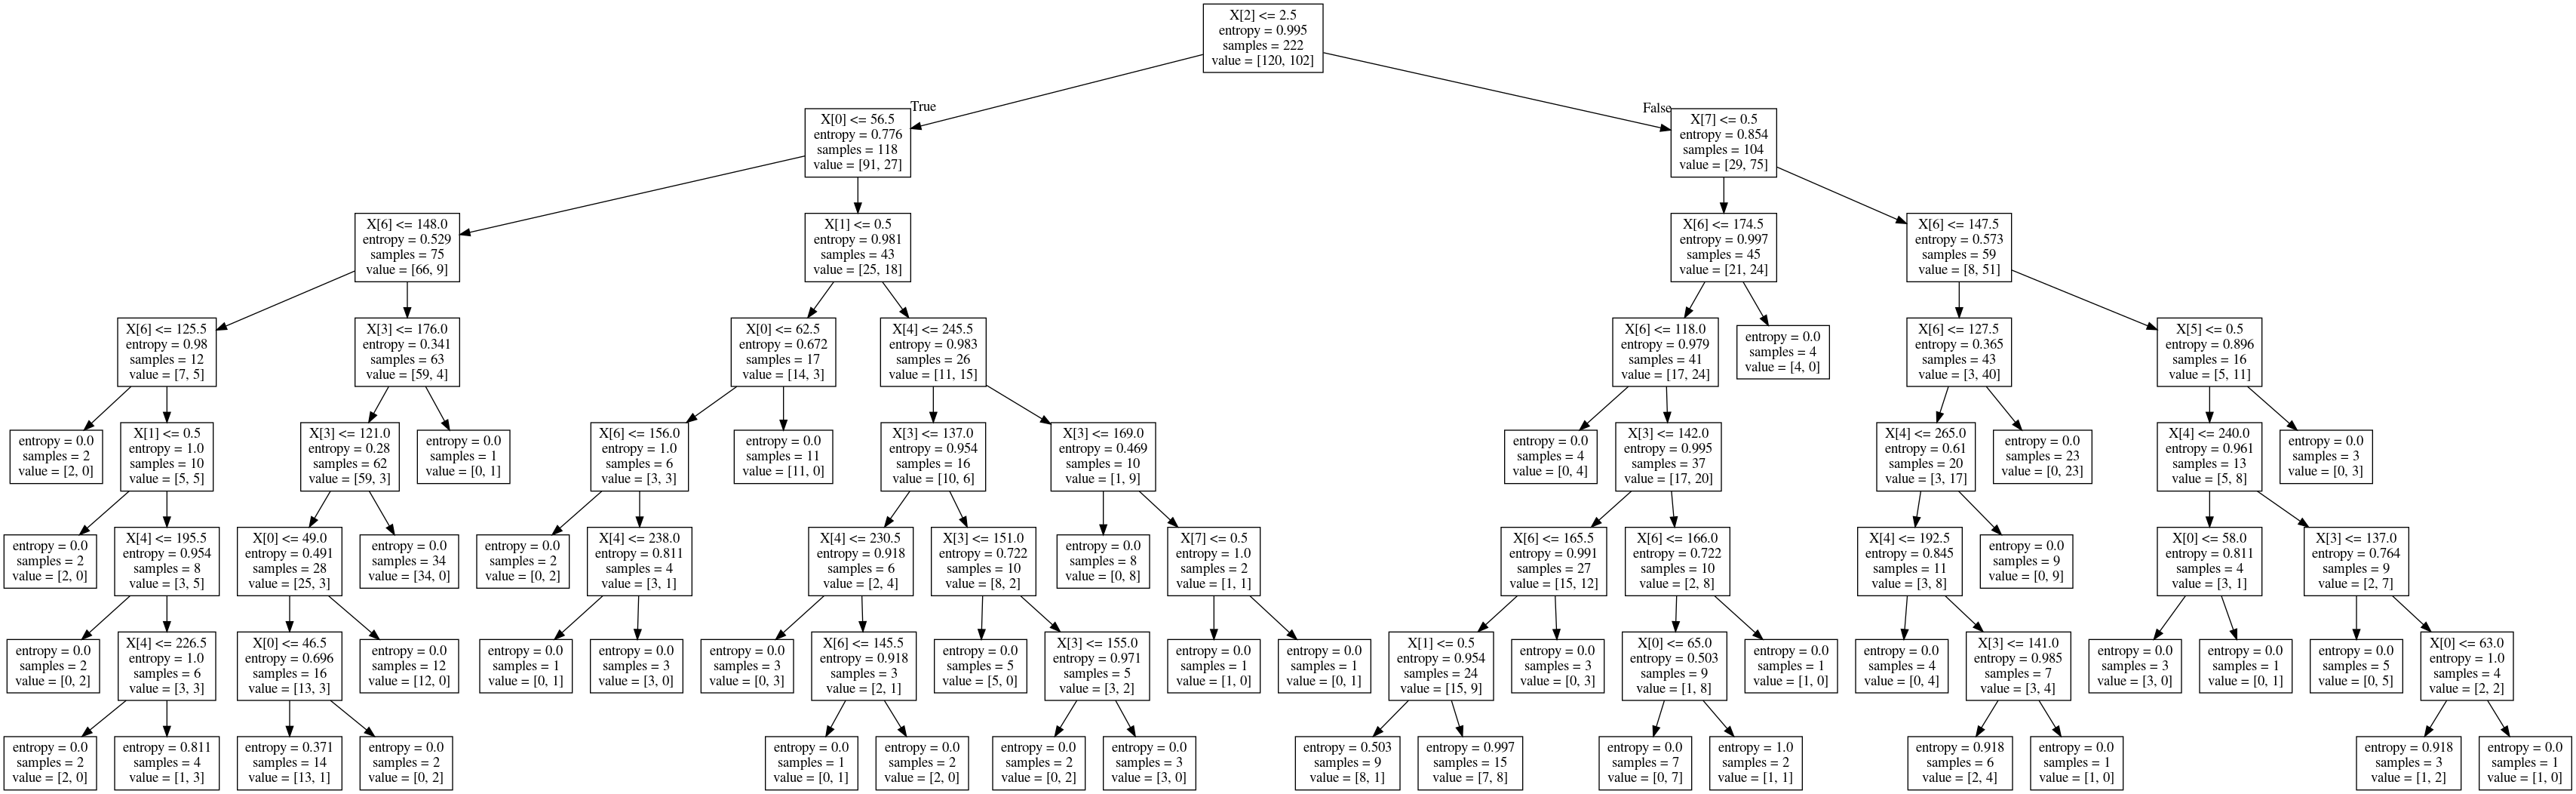

In [28]:
# Graphic for decision tree model pruned at 7 using entropy

dot_data = StringIO()
export_graphviz(dt_p_fin, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())

In [29]:
# Random Forest Model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        40
           1       0.79      0.66      0.72        35

   micro avg       0.76      0.76      0.76        75
   macro avg       0.77      0.75      0.75        75
weighted avg       0.76      0.76      0.76        75



/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
# accuracy score for random forest model (unpruned)

accuracy_score(y_test, y_test_pred_rf)

0.76

In [31]:
# Prune the forest - gini

rf_p1 = RandomForestClassifier(criterion="gini")
rf_p1.fit(X_train, y_train)
y_test_pred_rf_p1 = rf_p1.predict(X_test)
print("Criterion=gini", classification_report(y_test, y_test_pred_rf_p1))

Criterion=gini               precision    recall  f1-score   support

           0       0.71      0.88      0.79        40
           1       0.81      0.60      0.69        35

   micro avg       0.75      0.75      0.75        75
   macro avg       0.76      0.74      0.74        75
weighted avg       0.76      0.75      0.74        75



/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
# accuracy score for random forest model using gini

accuracy_score(y_test, y_test_pred_rf_p1)

0.7466666666666667

In [33]:
# Prune the forest - entropy

rf_p2 = RandomForestClassifier(criterion="entropy")
rf_p2.fit(X_train, y_train)
y_test_pred_rf_p2 = rf_p2.predict(X_test)
print("Criterion=entropy", classification_report(y_test, y_test_pred_rf_p2))

Criterion=entropy               precision    recall  f1-score   support

           0       0.73      0.90      0.81        40
           1       0.85      0.63      0.72        35

   micro avg       0.77      0.77      0.77        75
   macro avg       0.79      0.76      0.77        75
weighted avg       0.79      0.77      0.77        75



/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
# accuracy score for random forest model using entropy

accuracy_score(y_test, y_test_pred_rf_p2)

0.7733333333333333

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

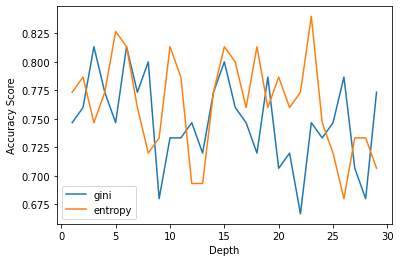

In [35]:
# Prune the forest - loop to find best depth

max_depth_rf = []
acc_gini_rf = []
acc_entropy_rf = []
for i in range(1, 30):
    tree_rf = RandomForestClassifier(criterion="gini", max_depth=i)
    tree_rf.fit(X_train, y_train)
    pred_g_rf = tree_rf.predict(X_test)
    acc_gini_rf.append(accuracy_score(y_test, pred_g_rf))

    tree_rf = RandomForestClassifier(criterion="entropy", max_depth=i)
    tree_rf.fit(X_train, y_train)
    pred_e_rf = tree_rf.predict(X_test)
    acc_entropy_rf.append(accuracy_score(y_test, pred_e_rf))

    max_depth_rf.append(i)

df_rf = pd.DataFrame(
    {
        "acc_gini_rf": pd.Series(acc_gini_rf),
        "acc_entropy_rf": pd.Series(acc_entropy_rf),
        "max_depth_rf": pd.Series(max_depth_rf),
    }
)

# visualizing changes in parameters
plt.plot("max_depth_rf", "acc_gini_rf", data=df_rf, label="gini")
plt.plot("max_depth_rf", "acc_entropy_rf", data=df_rf, label="entropy")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()

In [36]:
# Prune forest using entropy at 9

rf_p_fin = RandomForestClassifier(criterion="entropy", max_depth=9)
rf_p_fin.fit(X_train, y_train)
y_test_pred_rf_p_fin = rf_p_fin.predict(X_test)
print("Criterion=entropy", classification_report(y_test, y_test_pred_rf_p_fin))

Criterion=entropy               precision    recall  f1-score   support

           0       0.73      0.75      0.74        40
           1       0.71      0.69      0.70        35

   micro avg       0.72      0.72      0.72        75
   macro avg       0.72      0.72      0.72        75
weighted avg       0.72      0.72      0.72        75



/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
# accuracy score for  forest using entropy at 9

accuracy_score(y_test, y_test_pred_rf_p_fin)

0.72

In [46]:
dt_p_fin.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
dt_p_fin.predict([[65, 0, 3, 110, 264, 1, 131, 1]])[0]

1

In [49]:
joblib.dump(dt_p_fin, "clf.joblib")

['clf.joblib']